# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file, the `$SNNAME.dat` and the `$SNNAME.stat` file.

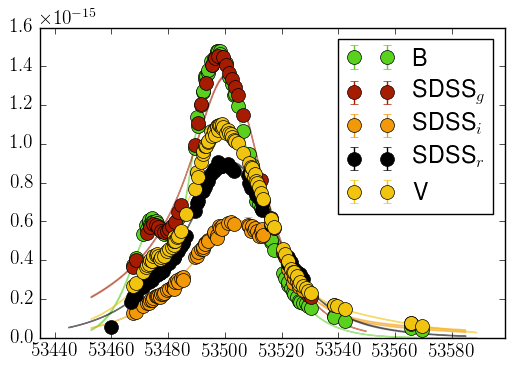

In [28]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def col(i):
    colour = {0 : "#59D11D", 1 : "#A61C00", 2 : "#F2990A", \
              3 : "#000000", 4 : "#f1c40f", 5 : "#e67e22", \
              6 : "#e74c3c", 7 : "#1abc9c"}
    return colour[i % 8]

reconfile = '/Users/berto/Code/CoCo/recon/SN2005bf.dat'
lcfile = '/Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat'

RECON = np.loadtxt(reconfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
LC = np.loadtxt(lcfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
FLT = np.unique(LC[3])

for i in range(FLT.size):
    idx = np.where(LC[3] == FLT[i])
    plt.errorbar(LC[0][idx], LC[1][idx], yerr=LC[2][idx], markersize=10, fmt='o', color=col(i), label=FLT[i].decode())

    idx = np.where(RECON[3] == FLT[i])
    plt.fill_between(RECON[0][idx], RECON[1][idx] + RECON[2][idx], RECON[1][idx] - RECON[2][idx], color=col(i), alpha=0.5)


plt.xlim(RECON[0].min() - 10, RECON[0].max() + 10)
plt.legend()
plt.show()

In [29]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

In [30]:
L = pcc.LCfit()

In [31]:
L.recon_directory

'/Users/berto/Code/CoCo/recon'

In [32]:
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2005bf.dat'))
print(recon_filename)
L.load_formatted_phot(recon_filename)
L.unpack()

/Users/berto/Code/CoCo/recon/SN2005bf.dat
relative_lambda =  0.451470183115
relative_lambda =  0.59187172309
relative_lambda =  1.49731871951
relative_lambda =  1.0712232953
relative_lambda =  0.812289937234


In [33]:
L.data

OrderedDict([('B', <Table length=137>
                MJD            flux          ...       flux_upper             flux_lower      
                 d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
              float64        float64         ...        float64                float64        
              ------- ---------------------- ... ---------------------- ----------------------
              53452.7             4.0869e-17 ...           4.271787e-17           3.902013e-17
              53453.7            4.89451e-17 ...           5.102047e-17           4.686973e-17
              53454.7            5.84522e-17 ...           6.076482e-17           5.613958e-17
              53455.7            6.95926e-17 ...            7.21487e-17            6.70365e-17
              53456.7            8.25806e-17 ...            8.53803e-17            7.97809e-17
              53457.7             9.7637e-17 ...          1.0067257e-16           9.460143e-17
            

In [37]:
L.data_filters

{'_filter_file_path': '/Users/berto/Code/CoCo/data/filters/B.dat',
 '_plot_colour': (0.40196078431372551,
  0.98816547208125938,
  0.75940491665470711,
  1.0),
 '_wavelength_units': Unit("Angstrom"),
 'filter_name': 'B',
 'lambda_effective': <Quantity 4354.410549343705 Angstrom>,
 'throughput': array([ 0.   ,  0.03 ,  0.134,  0.567,  0.92 ,  0.978,  1.   ,  0.978,
         0.935,  0.853,  0.74 ,  0.64 ,  0.536,  0.424,  0.325,  0.235,
         0.15 ,  0.095,  0.043,  0.009,  0.   ]),
 'wavelength': array([ 3600.,  3700.,  3800.,  3900.,  4000.,  4100.,  4200.,  4300.,
         4400.,  4500.,  4600.,  4700.,  4800.,  4900.,  5000.,  5100.,
         5200.,  5300.,  5400.,  5500.,  5600.]),
 'wavelength_u': <Quantity [ 3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
             4500., 4600., 4700., 4800., 4900., 5000., 5100., 5200., 5300.,
             5400., 5500., 5600.] Angstrom>}

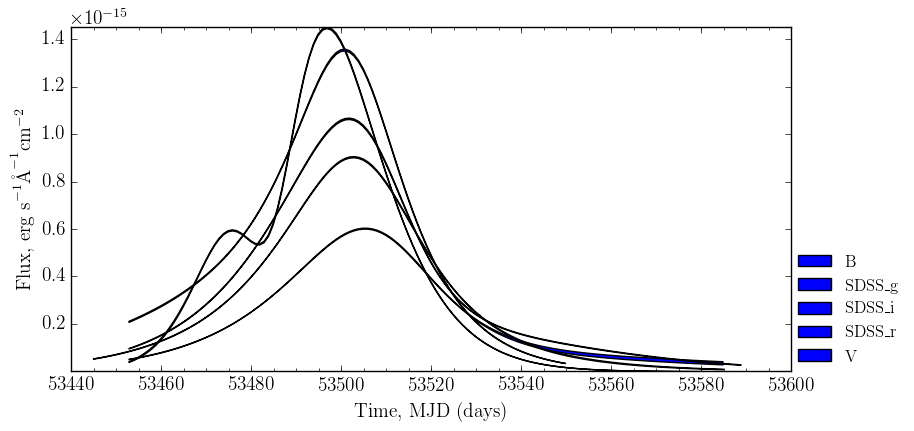

In [35]:
L.plot()